Librairies :)

In [1]:
from classy import Class
import numpy as np
from matplotlib import pyplot as plt

Let's compare different ways to create cosmological models

In [2]:

#### -------  Setting up the parameters  -------  #####

#We run several simulations, stocked in this list
cosmo=[]

# 0th - Analytical one (we just give the parameters for the power spectra that we know from observations)

cosmo += [Class()]
cosmo[0].set({'omega_b':0.0223828,'omega_cdm':0.1201075,'h':0.67810,'A_s':2.100549e-09,'n_s':0.9660499,'tau_reio':0.05430842, 'r':1, 'k_pivot':0.05})
cosmo[0].set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})
cosmo[0].set({'modes':'s,t'})   
cosmo[0].set({'Pk_ini_type':'analytic_Pk'}) 

## All the rest : we calculate perturbatively
# 1st - Classical polynomial with potential parameters
cosmo += [Class() ]
cosmo[1].set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})
cosmo[1].set({'modes':'s,t'})   
cosmo[1].set({'Pk_ini_type':'inflation_V'})  
cosmo[1].set({'potential':'polynomial'})
cosmo[1].set({'V_0':1.e-13,'V_1':-1.e-14,'V_2':7.e-14,'V_3':0.,'V_4':0.})    

# 2nd - Clasical polynomial with Slow roll parameters
cosmo += [ Class() ]
cosmo[2].set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})
cosmo[2].set({'modes':'s,t'})   
cosmo[2].set({'Pk_ini_type':'inflation_V'})  
cosmo[2].set({'potential':'polynomial'})
cosmo[2].set({'PSR_0':2.18e-9,'PSR_1':0.001989,'PSR_2':0.0003979,'PSR_3':0.,'PSR_4':0.})    

# 3rd - Natural inflation with potential parameters
cosmo += [ Class() ]
cosmo[3].set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})
cosmo[3].set({'modes':'s,t'})   
cosmo[3].set({'Pk_ini_type':'inflation_V'})  
cosmo[3].set({'potential':'natural'})
cosmo[3].set({'V_0':1.e-13,'V_1':-1.e-14,'V_2':7.e-14})   

# 4th - Higgs inflation from arXiv:1403.6078,  with potential parameters
# cosmo += [ Class() ]
# cosmo[3].set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})
# cosmo[3].set({'modes':'s,t'})   
# cosmo[3].set({'Pk_ini_type':'inflation_V'})  
# cosmo[3].set({'potential':'higgs_inflation'})
# cosmo[3].set({'PSR_0':2.18e-9,'PSR_1':0.001889,'PSR_2':0.0005979,'PSR_3':0.000005,'PSR_4':0.})   


# 4th - Brane Inflation with the true potential (not develeped around k*)
# not yet implemented
p_BI=4
N_BI=5
v_BI=16/27
g_s_BI=0.005
alphap_BI=0.25

from math import pi
T_3_BI = 1/((pow(2.*pi,3)*g_s_BI*pow(alphap_BI,2)))
#Masse de planck réduite
csteGrav = 6.6743015e-11
M_pl = 8*pi*csteGrav

phi0_BI = 1
# Values of the parameters of the potential V(phi)=M^4/(1+(phi/mu)^-p) 
# as functions of the other parameters

#V0_BI = M^4
V0_BI=4*(pi**2)*v_BI*pow(phi0_BI,4)/N_BI

    ## Paramètres en fonction de ceux-là

# cosmo += [ Class()]
# cosmo[4].set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})
# cosmo[4].set({'modes':'s,t'})   
# cosmo[4].set({'Pk_ini_type':'inflation_V'})  
# cosmo[4].set({'potential':'brane_inflation'})
# cosmo[4].set({'PSR_0':2.18e-9,'PSR_1':0.001889,'PSR_2':0.0005979,'PSR_3':0.000005,'PSR_4':0.})


# Number of cosmological models
N = len(cosmo) 
print(N)

l_label= [["Analytical",""],['polynomial','V_i'],['polynomial','PSR_i'],['inflation_V','V_i']]
style = [ '-','--','--','--']

## General parameters
l_max_scalars= 2500
l_max_tensors = 600



4


Compute everything

In [3]:
#### -------  We run the simulation -------  #####

## Run each Class computation
for i in range(N):
    cosmo[i].compute()

primo = [ cosmo[i].get_primordial() for i in range(N)]

Exctracting some observables!

In [4]:
###### ----- Extracting valuable data  (k, power spectra Ps(k), ...  correlation function in harmonic   Cl, ClT, ... ) ---- #####

##   List of keys : 
## 'tt', 'ee', 'te', 'bb', 'pp', 'tp', 'ell'
##
## ## ## ## 

kk = [ primo[i]['k [1/Mpc]'] for i in range(N)]

P_s= [ primo[i]['P_scalar(k)'] for i in range(N) ]
P_t= [ primo[i]['P_tensor(k)'] for i in range(N) ]

#cls = [ cosmo[i].raw_cl(l_max_tensors) for i in range(N) ]
cls = [cosmo[i].lensed_cl(2500) for i in range(N)]
ll = [cls[i]['ell'][2:] for i in range(N)]
clTT = [cls[i]['tt'][2:] for i in range(N)]
clEE = [cls[i]['ee'][2:] for i in range(N)]
clTE = [cls[i]['te'][2:] for i in range(N)]
clBB = [cls[i]['bb'][2:] for i in range(N)]
clPP = [cls[i]['pp'][2:] for i in range(N)]
clTP = [cls[i]['tp'][2:] for i in range(N)]




h = [ cosmo[i].h() for i in range(N) ] # get reduced Hubble for conversions to 1/Mpc




Plotting time

In [5]:
#Colors ( for the plotting blabla)
C=['crimson','mediumspringgreen','b','orange','violet','indigo']
# C=[]

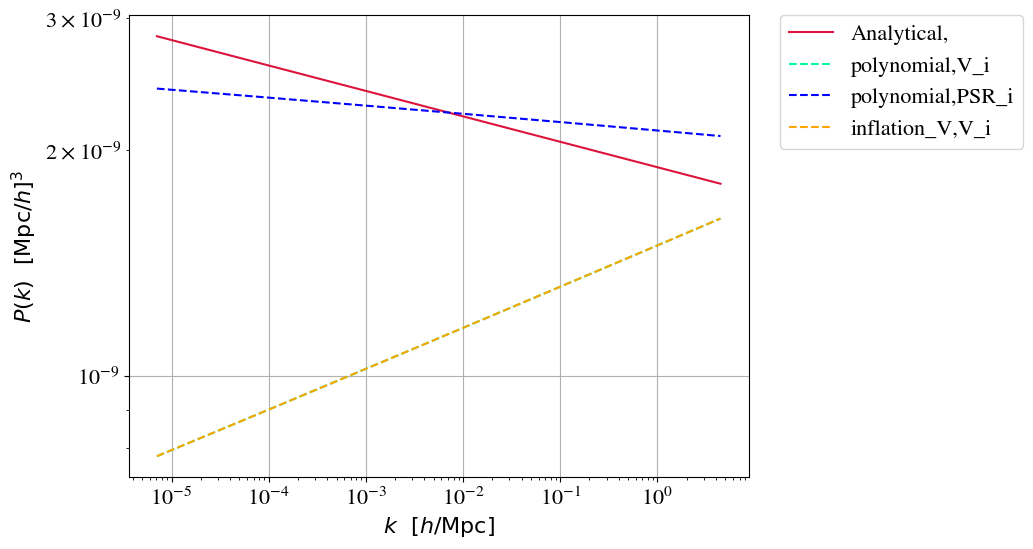

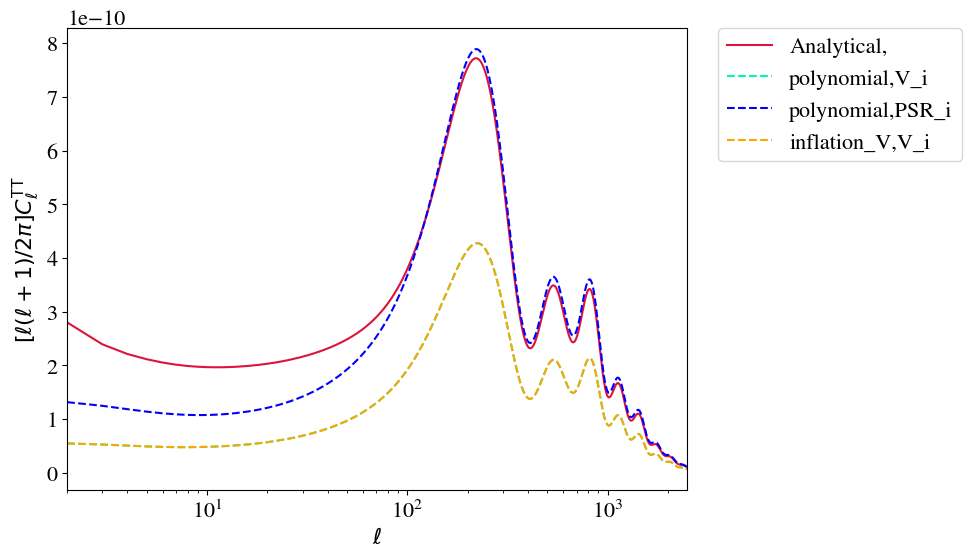

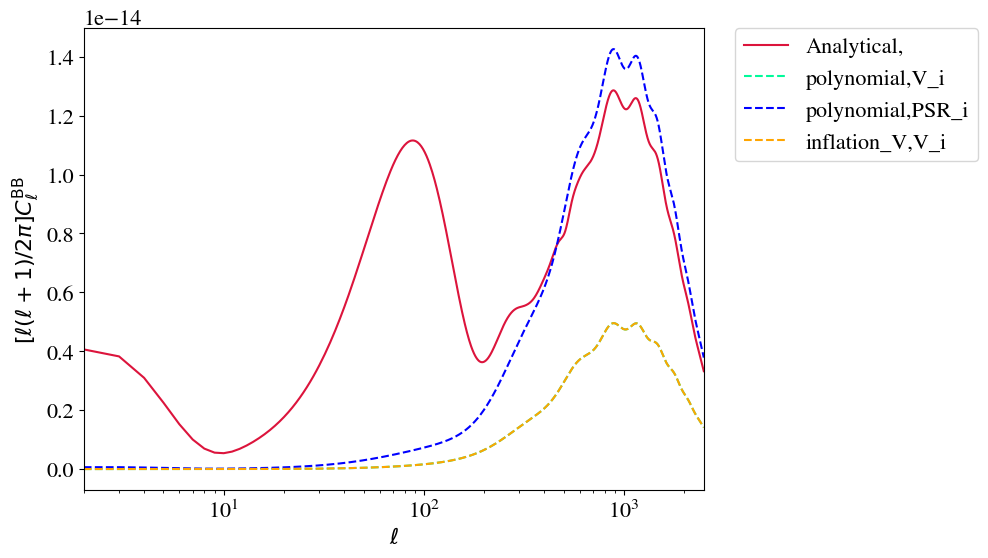

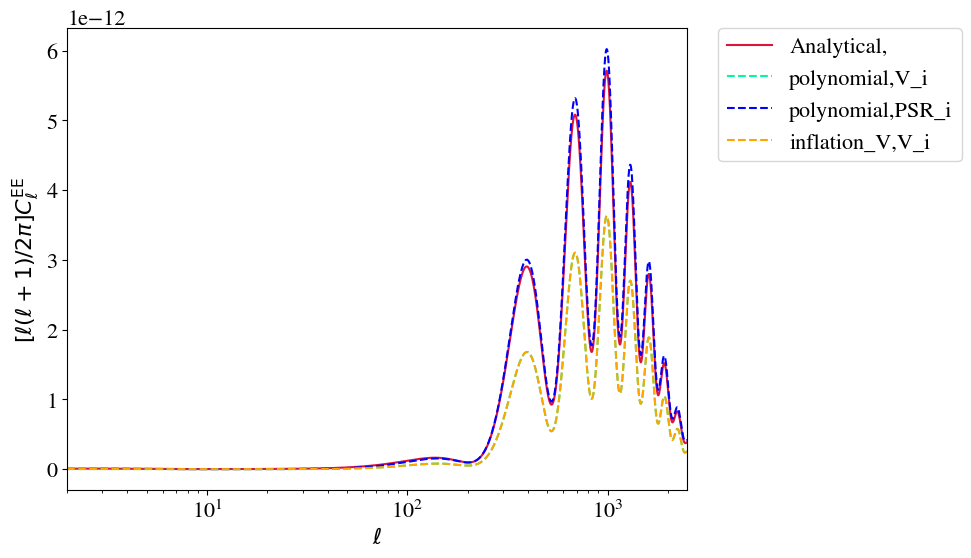

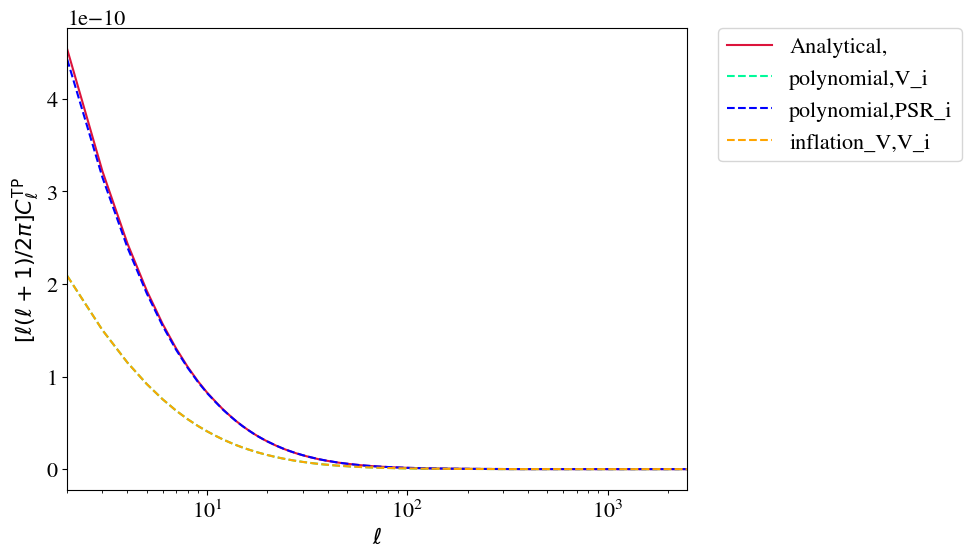

In [14]:
##### --------- Plotting ------- #####
%matplotlib inline
#
import matplotlib
import matplotlib.pyplot as plt
#
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]



# Power spectrum scalar

for i in range(N):
    for k in kk[i]:
        P_s.append( primo[i]['P_scalar(k)'])
        P_t.append(primo[i]['P_tensor(k)'])


    plt.loglog(kk[i],P_s[i],color=C[i],linestyle=style[i],label= l_label[i][0]+","+l_label[i][1])
    

plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
plt.title(r"")

plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


# plot C_l^TT
from math import pi

plt.figure(1)
plt.xscale('log');plt.yscale('linear');plt.xlim(2,2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
for i in range(N):
    plt.plot(ll[i],clTT[i]*ll[i]*(ll[i]+1)/2./pi,color=C[i],linestyle=style[i],label= l_label[i][0]+","+l_label[i][1])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()



# plot C_l^BB
from math import pi

plt.figure(1)
plt.xscale('log');plt.yscale('linear');plt.xlim(2,2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{BB}$')
for i in range(N):
    plt.plot(ll[i],clBB[i]*ll[i]*(ll[i]+1)/2./pi,color=C[i],linestyle=style[i],label= l_label[i][0]+","+l_label[i][1])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

# plot C_l^EE
from math import pi

plt.figure(1)
plt.xscale('log');plt.yscale('linear');plt.xlim(2,2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{EE}$')
for i in range(N):
    plt.plot(ll[i],clEE[i]*ll[i]*(ll[i]+1)/2./pi,color=C[i],linestyle=style[i],label= l_label[i][0]+","+l_label[i][1])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

# plot C_l^TP
from math import pi

plt.figure(1)
plt.xscale('log');plt.yscale('linear');plt.xlim(2,2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TP}$')
for i in range(N):
    plt.plot(ll[i],clTP[i]*ll[i]*(ll[i]+1)/2./pi,color=C[i],linestyle=style[i],label= l_label[i][0]+","+l_label[i][1])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

Comparing tensor-to-scalar ratios

In [7]:
## Function that calculates the tensor-to-scalar ratio of a cosmological object
import numpy as np
from scipy.interpolate import interp1d

def calcule_r(kk,P_s,P_t):    
    # We evaluate at k0 = 0.05 Mpc^-1
    # we interpolate with Scipy

    f1 = interp1d(kk, P_s)
    f2= interp1d(kk,P_t)
    r= f2(0.05)/f1(0.05)

    return(r)



In [8]:
## Function that calculates the tilts a power spectrum (knowing k,P_s,P_t)
import numpy as np
from scipy.interpolate import interp1d

def calcule_ns(kk,P_s):    
    y = np.log(P_s)
    x=np.log(kk)

    xnew = np.zeros(len(kk)-1)
    df = np.zeros(len(kk)-1)

    for i in range(len(kk)-1): 
        xnew[i] = (x[i] + x[i+1]) / 2
        df[i] = (y[i+1] - y[i]) / (x[i+1] - x[i])
    
    # plt.plot(x,y)
    # plt.show()
    # plt.plot(xnew,df)
    # plt.show()
    n_s = 1 + np.mean(df)
    return(n_s)

def calcule_alphas(kk,P_s):    
    y = np.log(P_s)
    x=np.log(kk)

    xnew = np.zeros(len(kk)-1)
    dln_Ps = np.zeros(len(kk)-1)

    for i in range(len(kk)-1): 
        xnew[i] = (x[i] + x[i+1]) / 2
        dln_Ps[i] = (y[i+1] - y[i]) / (x[i+1] - x[i])
    ln_ns=np.log(1+dln_Ps)

    xnewnew = np.zeros(len(kk)-2)
    dln_ns = np.zeros(len(kk)-2)
    for i in range(len(kk)-2): 
        xnewnew[i] = (xnew[i] + xnew[i+1]) / 2
        dln_ns[i] = (ln_ns[i+1] - ln_ns[i]) / (xnew[i+1] - xnew[i])
 
    alpha_s = np.mean(dln_ns)
    return(alpha_s)

def calcule_nt(kk,P_t):    
    y = np.log(P_t)
    x=np.log(kk)

    xnew = np.zeros(len(kk)-1)
    df = np.zeros(len(kk)-1)

    for i in range(len(kk)-1): 
        xnew[i] = (x[i] + x[i+1]) / 2
        df[i] = (y[i+1] - y[i]) / (x[i+1] - x[i])
    
    n_t = np.mean(df)
    return(n_t)

In [9]:
## Calcul de r  pour chaque modèle

r=[ calcule_r(kk[i],P_s[i],P_t[i]) for i in range(N)]

for i in range(N):
    print(l_label[i][0] + " " + l_label[i][1])
    print(f"r={r[i]}")
    print()

Analytical 
r=1.0006804973628878

polynomial V_i
r=0.0033751615793452786

polynomial PSR_i
r=0.03158126743853233

inflation_V V_i
r=0.0033751615793452786



In [10]:
## n_s analytique donné
print("Theoretical : ",0.9660499)

## Calcul de n_s  pour chaque modèle

n_s=[ calcule_ns(kk[i],P_s[i]) for i in range(N)]

for i in range(N):
    print(l_label[i][0] + " " + l_label[i][1])
    print(f"n_s={n_s[i]}")
    print()

Theoretical :  0.9660499
Analytical 
n_s=0.9660499000000001

polynomial V_i
n_s=1.054704214950145

polynomial PSR_i
n_s=0.9890727480860074

inflation_V V_i
n_s=1.054704214950145



In [11]:
## Calcul de alpha_s pour chaque modèle

alpha_s=[ calcule_alphas(kk[i],P_s[i]) for i in range(N)]

for i in range(N):
    print(l_label[i][0] + " " + l_label[i][1])
    print(f"alpha_s={alpha_s[i]}")
    print()

Analytical 
alpha_s=-1.7975402337082055e-17

polynomial V_i
alpha_s=0.00010145872562507248

polynomial PSR_i
alpha_s=-8.013841748062593e-05

inflation_V V_i
alpha_s=0.00010145872562507248



In [12]:
## Calcul de n_t  pour chaque modèle

n_t=[ calcule_nt(kk[i],P_t[i]) for i in range(N)]

for i in range(N):
    print(l_label[i][0] + " " + l_label[i][1])
    print(f"n_t={n_t[i]}")
    print()

Analytical 
n_t=-0.13850907454297146

polynomial V_i
n_t=-0.00045953137185930187

polynomial PSR_i
n_t=-0.00392723398060079

inflation_V V_i
n_t=-0.00045953137185930187

